In [1]:
%load_ext autoreload
%autoreload 2

from jordan_wigner import jw_majoranas
from qiskit.quantum_info import PauliList
from tableau import spread_node, spread_node_slice, anticommutation_matrix
import random
from cost_functions import average_weight
from annealing import anneal
import matplotlib.pyplot as plt

In [4]:
N = 20

x, z = jw_majoranas(N)

paulis = PauliList.from_symplectic(z, x)

print(paulis)
print(f"Average Weight: {average_weight(x, z)}")

['IIIIIIIIIIIIIIIIIIIX', 'IIIIIIIIIIIIIIIIIIXZ', 'IIIIIIIIIIIIIIIIIXZZ',
 'IIIIIIIIIIIIIIIIXZZZ', 'IIIIIIIIIIIIIIIXZZZZ', 'IIIIIIIIIIIIIIXZZZZZ',
 'IIIIIIIIIIIIIXZZZZZZ', 'IIIIIIIIIIIIXZZZZZZZ', 'IIIIIIIIIIIXZZZZZZZZ',
 'IIIIIIIIIIXZZZZZZZZZ', 'IIIIIIIIIXZZZZZZZZZZ', 'IIIIIIIIXZZZZZZZZZZZ',
 'IIIIIIIXZZZZZZZZZZZZ', 'IIIIIIXZZZZZZZZZZZZZ', 'IIIIIXZZZZZZZZZZZZZZ',
 'IIIIXZZZZZZZZZZZZZZZ', 'IIIXZZZZZZZZZZZZZZZZ', 'IIXZZZZZZZZZZZZZZZZZ',
 'IXZZZZZZZZZZZZZZZZZZ', 'XZZZZZZZZZZZZZZZZZZZ', 'IIIIIIIIIIIIIIIIIIIY',
 'IIIIIIIIIIIIIIIIIIYZ', 'IIIIIIIIIIIIIIIIIYZZ', 'IIIIIIIIIIIIIIIIYZZZ',
 'IIIIIIIIIIIIIIIYZZZZ', 'IIIIIIIIIIIIIIYZZZZZ', 'IIIIIIIIIIIIIYZZZZZZ',
 'IIIIIIIIIIIIYZZZZZZZ', 'IIIIIIIIIIIYZZZZZZZZ', 'IIIIIIIIIIYZZZZZZZZZ',
 'IIIIIIIIIYZZZZZZZZZZ', 'IIIIIIIIYZZZZZZZZZZZ', 'IIIIIIIYZZZZZZZZZZZZ',
 'IIIIIIYZZZZZZZZZZZZZ', 'IIIIIYZZZZZZZZZZZZZZ', 'IIIIYZZZZZZZZZZZZZZZ',
 'IIIYZZZZZZZZZZZZZZZZ', 'IIYZZZZZZZZZZZZZZZZZ', 'IYZZZZZZZZZZZZZZZZZZ',
 'YZZZZZZZZZZZZZZZZZZZ']
Average Weight: 10.5


T0 = 40
['IIIIIIIIIIYZZZZZZZZZ', 'IIIIIIIIIIYZZZZZZZZY', 'IIIIIIIIIIYZZZZZZZYI',
 'IIIIIIIIIIYZZZZZZYII', 'IIIIIIIIIIYZZZZZYIII', 'IIIIIIIIIIYZZZZYIIII',
 'IIIIIIIIIIYZZZYIIIII', 'IIIIIIIIIIYZZYIIIIII', 'IIIIIIIIIIYZYIIIIIII',
 'IIIIIIIIIIYYIIIIIIII', 'IIIIIIIIIIZIIIIIIIII', 'IIIIIIIIIXXIIIIIIIII',
 'IIIIIIIIXZXIIIIIIIII', 'YZZZZZZZZZXIIIIIIIII', 'IIIIIIXZZZXIIIIIIIII',
 'IIIIIXZZZZXIIIIIIIII', 'IIIIXZZZZZXIIIIIIIII', 'IIIXZZZZZZXIIIIIIIII',
 'IIXZZZZZZZXIIIIIIIII', 'IXZZZZZZZZXIIIIIIIII', 'XZZZZZZZZZXIIIIIIIII',
 'IIIIIIIIIIYZZZZZZZZX', 'IIIIIIIIIIYZZZZZZZXI', 'IIIIIIIIIIYZZZZZZXII',
 'IIIIIIIIIIYZZZZZXIII', 'IIIIIIIIIIYZZZZXIIII', 'IIIIIIIIIIYZZZXIIIII',
 'IIIIIIIIIIYZZXIIIIII', 'IIIIIIIIIIYZXIIIIIII', 'IIIIIIIIIIYXIIIIIIII',
 'IIIIIIIXZZXIIIIIIIII', 'IIIIIIIIIYXIIIIIIIII', 'IIIIIIIIYZXIIIIIIIII',
 'IIIIIIIYZZXIIIIIIIII', 'IIIIIIYZZZXIIIIIIIII', 'IIIIIYZZZZXIIIIIIIII',
 'IIIIYZZZZZXIIIIIIIII', 'IIIYZZZZZZXIIIIIIIII', 'IIYZZZZZZZXIIIIIIIII',
 'IYZZZZZZZZXIIIIIIIII']


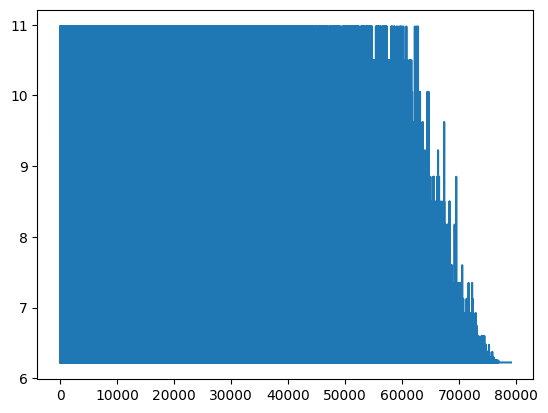

In [6]:
x, z, energies, energy_opt = anneal(x, z, explore=spread_node, energy=average_weight, cooling_rate=0.99995)

paulis = PauliList.from_symplectic(z, x)

print(paulis)

plt.plot(energies)

In [9]:
anticommutation_matrix(x, z)

array([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1,